In [1]:

import os
import torch
import data_setup, model_builder, engine, utils


NUM_EPOCHS = 15
BATCH_SIZE = 64
HIDDEN_UNITS = 20
LEARNING_RATE = 0.001

torch.manual_seed(42)  # Set seed for reproducibility

device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"
print(f"\nUsing device: {device}\n")

data_transform = utils.baseV0()



Using device: mps



In [2]:
# THIS WILL RUN A TRAINING CYCLE ON A TINY VGG MODEL
if __name__ == '__main__':

    train_dir = "/Users/kkodweis/Github-Repos/EAS510-BasicsAI/datasets/SampleV0/Train"
    test_dir = "/Users/kkodweis/Github-Repos/EAS510-BasicsAI/datasets/SampleV0/Test"

    data_transform = utils.baseV0()

    train_dataloader, test_dataloader, class_labels = data_setup.create_image_dataloaders(
        train_dir=train_dir,
        test_dir=test_dir,
        transform=data_transform.data_transform,
        batch_size=BATCH_SIZE
    )

    

In [ ]:
model = model_builder.ResNet18(num_classes=3).to(device)

    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(params=model.parameters(), lr=LEARNING_RATE)

    engine.train(
        model=model,
        train_dataloader=train_dataloader,
        test_dataloader=test_dataloader,
        optimizer=optimizer,
        loss_fn=loss_fn,
        device=device,
        epochs=NUM_EPOCHS
    )

    utils.save_model(model=model,target_dir="models", model_name="ResNet18_model_V3_Sample_V0_Transform_baseV0.pth")

    
    loaded_modelV2 = model_builder.TinyVGG(input_shape=3, hidden_units=HIDDEN_UNITS, output_shape=len(class_labels)).to(device)
    loaded_modelV2.load_state_dict(torch.load("models/tinyvgg_model_V3.pth"))

    print(f"Loaded model:\n{loaded_modelV2}")
    print(f"Model on device:\n{next(loaded_modelV2.parameters()).device}")

    # Evaluate loaded model
    loaded_modelV2.eval()
    with torch.inference_mode():
        loaded_modelV2_preds = loaded_modelV2(test_dataloader)
    print(loaded_modelV2_preds)


/var/folders/39/bh4fw4vj6418nv0wlwfwd9t40000gn/T/ipykernel_53808/3797785653.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_modelV2.load_state_dict(torch.load("mo

Loaded model:
ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.622571].


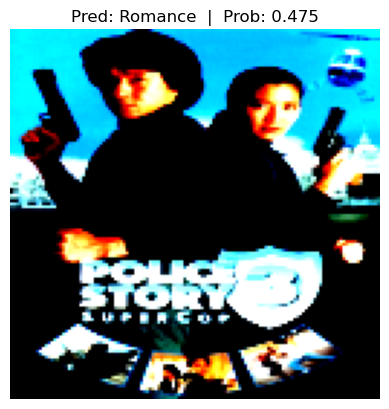

In [3]:
class_names = ["Action", "Documentary", "Romance"]

loaded_modelV2 = model_builder.ResNet18(num_classes=3).to(device)
loaded_modelV2.load_state_dict(torch.load("models/ResNet18_model_V3_Sample_V0_Transform_baseV0.pth"))

print(f"Loaded model:\n{loaded_modelV2}")
print(f"Model on device:\n{next(loaded_modelV2.parameters()).device}")

utils.pred_and_plot_img(loaded_modelV2, "/Users/kkodweis/Github-Repos/EAS510-BasicsAI/datasets/SampleV0/Train/Action/1C49MPtKZ8fZXtzwSj4Ha0eEEjl.jpg", class_names=class_names, transform= data_transform.data_transform, device=device)

In [ ]:
rdh.set_root_path("/Users/kkodweis/Github-Repos/EAS510-BasicsAI/multi-modal/datasets")

import pandas as pd

input_dataframe = pd.read_csv('/Users/kkodweis/Github-Repos/EAS510-BasicsAI/multi-modal/RAW_DATA/mymoviedb_EAS510.csv')

for genre in data_setup.get_genres(input_dataframe):
    print(f"{genre}\n")



In [ ]:
SAMPLE_NAME = "SampleV1"  # Name of the sample directory

labels = [ 'War', 'Horror']  #"Comedy", "Western", "Thriller",

print(input_dataframe.columns)




In [ ]:
#rdh.mk_sample(SAMPLE_NAME, input_dataframe, "Genre", "Poster_Urls", labels)

In [ ]:
import requests

genre = 'Action'

base_url = 'https://api.movieposterdb.com/search?q=matrix'

token = '528|MiCJGTHfoUrdFFs7iaAb2bC46iO1F7DkHc4AqgC4'

def getActionMovies():
    url = f"https://api.movieposterdb.com/v1/genres"
    headers = {
        "Authorization": f"Bearer {token}",
        "Accept": "application/json"
    }

    response = requests.get(url, headers=headers)
    print(response)

    if response.status_code == 200:
        print(response.json())
        #print(genre_data)
    else:
        print(f"Failed to retrieve data {response.status_code}")

getActionMovies()
